# Dendrogram - With PCA

### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Data wrangling
#### 3. PCA
#### 4. Dendrogram 
    4.1 Single Method
    4.2 Complete Method
    4.3 Average method
    4.4 Ward method

### 1. Importing Libraries and Data

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [17]:
path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Machine Learning with Python\Achievement 2- Real-world appllication of Machine Learning\Data Sets'

In [19]:
path

'C:\\Users\\mosh_\\OneDrive\\Desktop\\Career Foundry\\Machine Learning with Python\\Achievement 2- Real-world appllication of Machine Learning\\Data Sets'

In [21]:
df = pd.read_csv(os.path.join(path, 'Data_scaled.csv'))
df

,Unnamed: 0,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,-1.731975,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,-1.731824,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,-1.731673,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,-1.731523,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,-1.731372,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,1.731372,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,1.731523,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,1.731673,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,1.731824,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [22]:
df.shape

(22950, 172)

In [25]:
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Data wrangling

##### Reducing  the data set down to 1 year- 2010

In [29]:
df2010 = df[df['DATE'].astype(str).str.contains('2010')] #<-----INSERT YEAR HERE
df2010

,Unnamed: 0,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
731,731,-1.621637,19620101,1,1.076130,-0.02793,1.910140,-0.001949,-1.251420,5.165884,...,-2.897272,-0.081896,0.583340,-0.747520,-0.490810,-0.024706,0.732577,-2.530829,-2.705946,-1.988830
732,732,-1.621486,19620102,1,1.076130,-0.02793,2.000476,-0.001949,-1.251420,-0.245107,...,-3.510664,-0.363113,1.142672,-0.653268,-0.490810,-0.024706,0.882756,-3.311925,-3.525772,-2.650263
733,733,-1.621335,19620103,1,1.076130,-0.02793,2.090813,-0.001949,-1.251420,-0.205026,...,-1.670486,-0.081896,1.273183,-1.018492,-0.490810,-0.024706,-0.408784,-3.161715,-3.553099,-2.333925
734,734,-1.621184,19620104,1,0.244897,-0.02793,1.819803,-0.001949,-1.251420,-0.445514,...,-1.057093,-0.081896,1.282505,-0.782864,-0.490810,-0.024706,-0.048354,-2.320534,-3.088531,-1.643734
735,735,-1.621034,19620105,1,1.076130,-0.02793,2.181150,-0.001949,-1.251420,-0.445514,...,1.396477,0.199321,0.592662,-1.183432,-0.052901,-0.024706,-1.039536,-1.929986,-2.760601,-0.752237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22650,22650,1.686844,20220105,1,-0.586336,-0.02793,-0.257946,-0.766151,-0.875535,-0.405433,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22651,22651,1.686995,20220106,1,0.660514,-0.02793,0.826097,0.563561,-1.090326,-0.425473,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22652,22652,1.687146,20220107,1,0.660514,-0.02793,1.006770,0.441289,-1.186982,-0.044700,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22653,22653,1.687297,20220108,1,0.244897,-0.02793,-0.619294,-0.766151,-1.079587,0.376155,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


####  3.1 Single Method

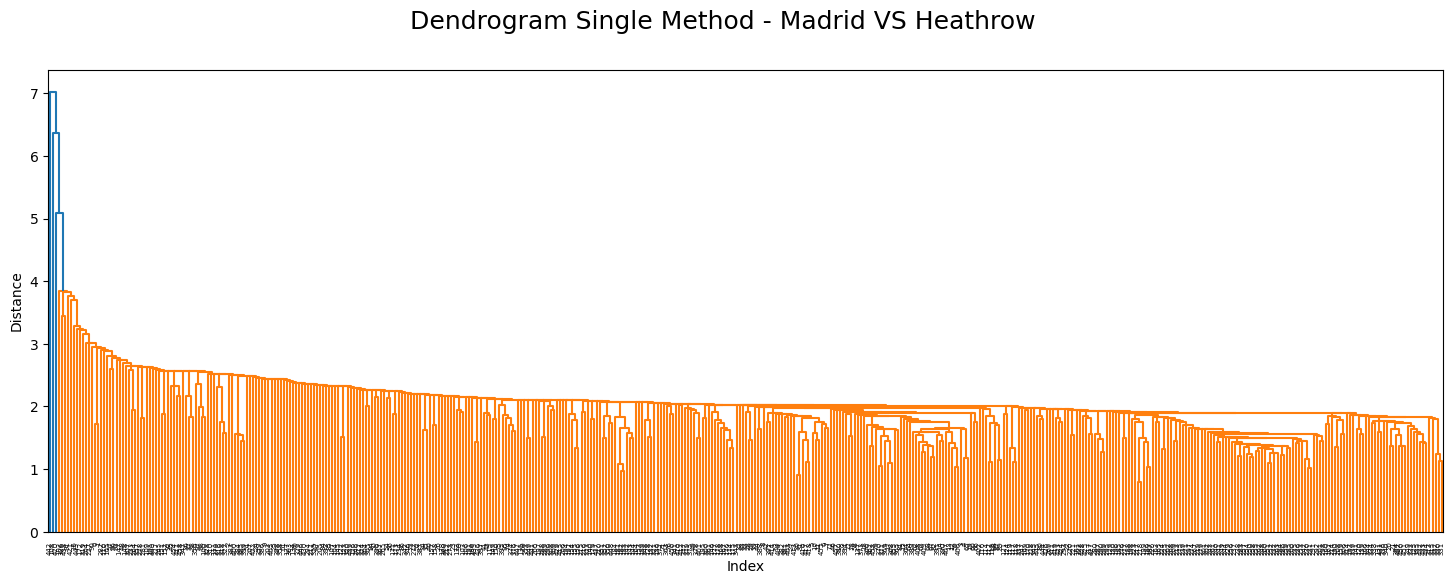

In [59]:
distance_single = linkage(df2010.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',]],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method - Madrid VS Heathrow",fontsize=18)
plt.show()

####  3.2 Complete Method

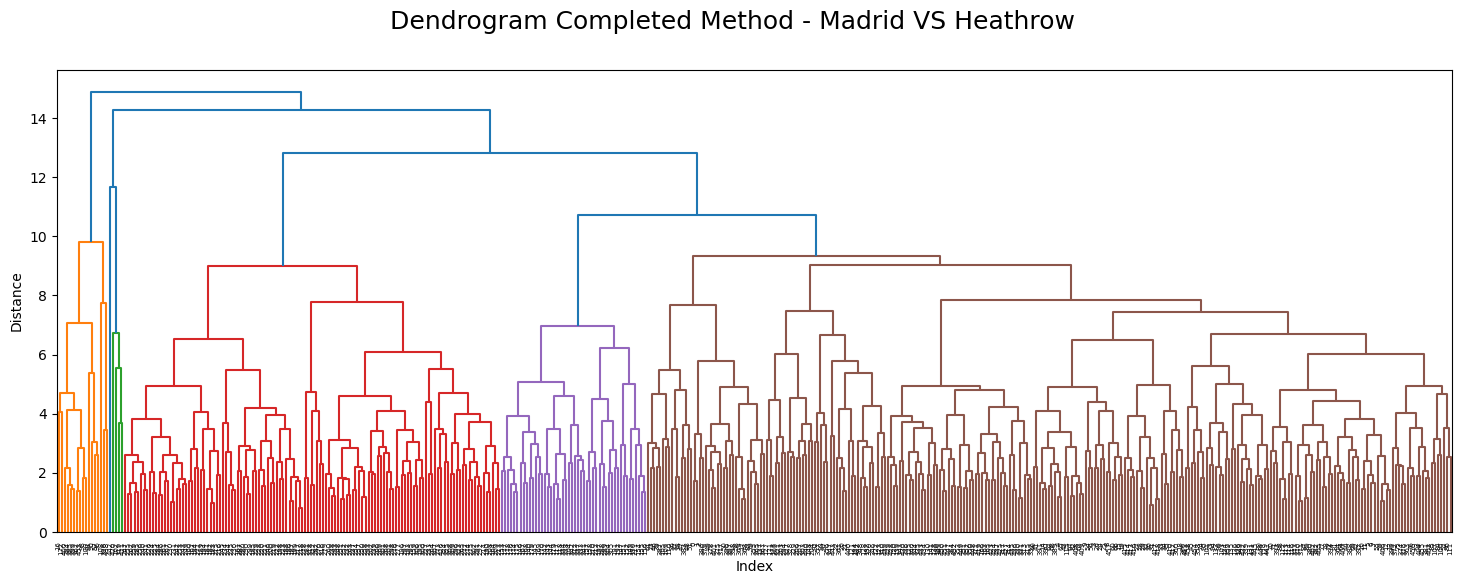

In [61]:
distance_single = linkage(df2010.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Completed Method - Madrid VS Heathrow",fontsize=18)
plt.show()

####  3.3 Average Method

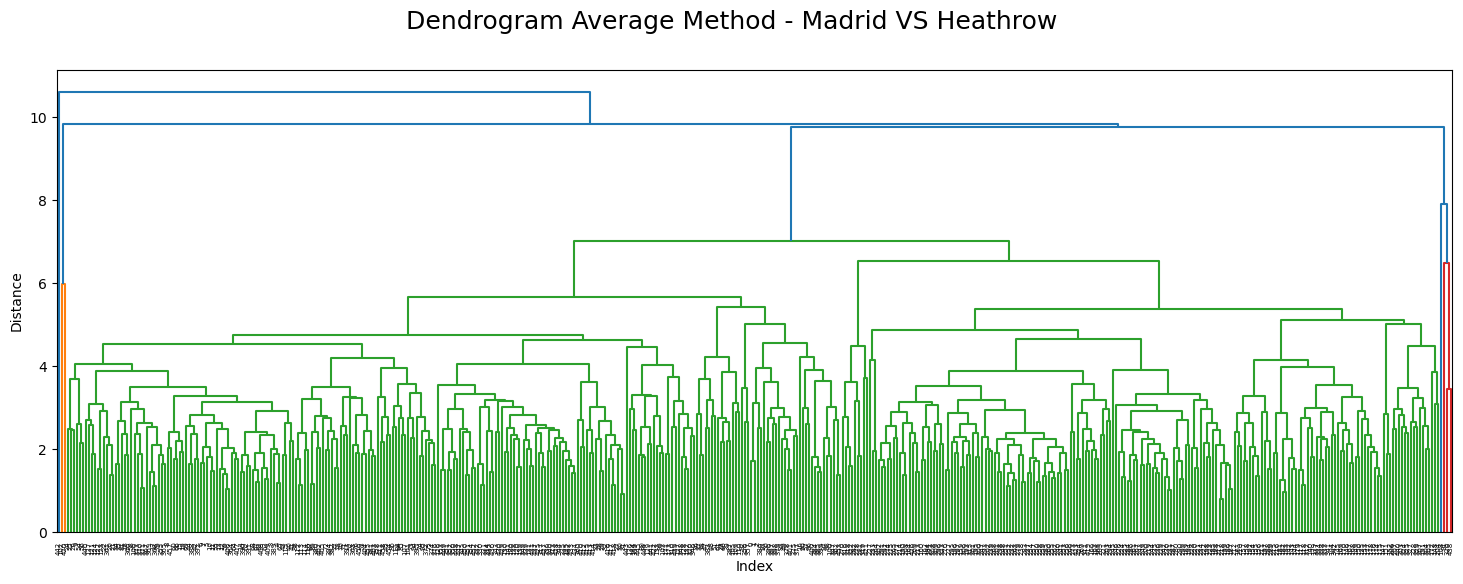

In [63]:
distance_single = linkage(df2010.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',]],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method - Madrid VS Heathrow",fontsize=18)
plt.show()

####  3.4 Ward Method

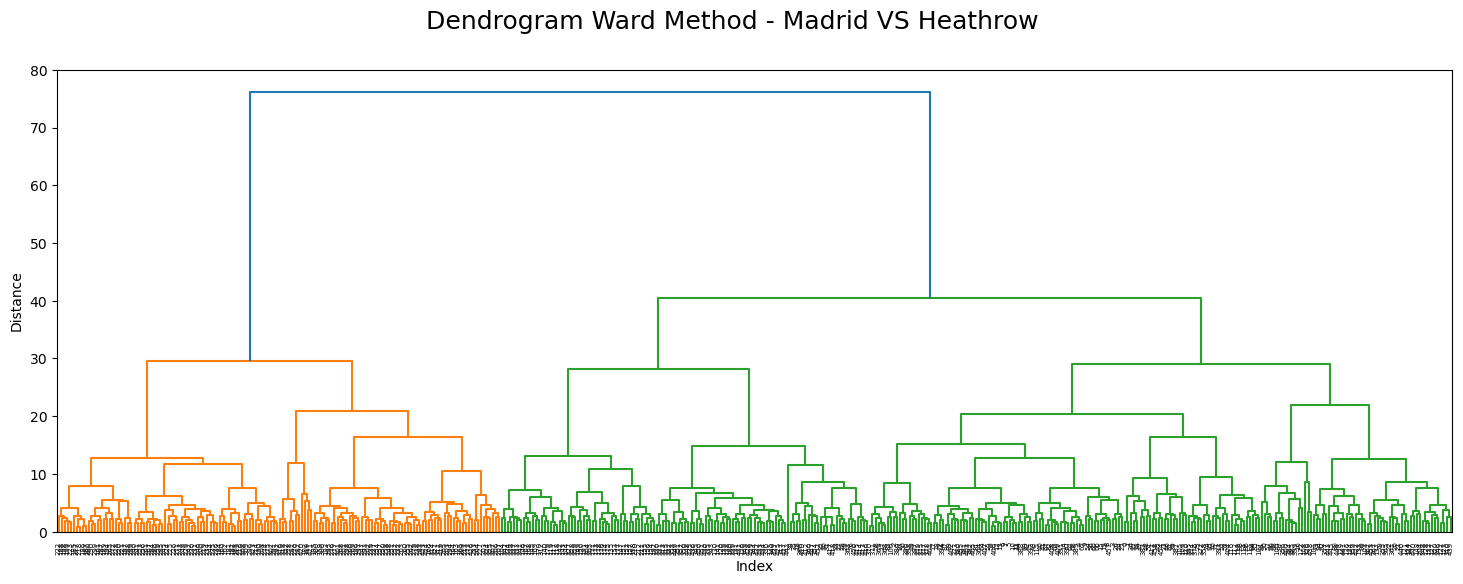

In [65]:
distance_single = linkage(df2010.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',]],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - Madrid VS Heathrow",fontsize=18)
plt.show()

### 3. PCA

In [36]:
# removing all columns with global radiation, precipitation and pressue

filtered_columns = [
    col for col in df2010.columns
    if all(x not in col for x in ['global_radiation', 'precipitation', 'pressure'])
]
df2010 = df2010[filtered_columns]

In [38]:
df2010.shape

(459, 123)

In [44]:
# running a PCA to reduce the dataset down to 9 component
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df2010)


In [46]:
principalComponents

array([[ 4.62875208e+05, -4.64468168e+01, -9.62078067e-01, ...,
         1.58437258e+01,  2.28678452e+00, -4.61220786e+00],
       [ 4.62874172e+05, -4.74054028e+01,  3.31474140e+00, ...,
         4.49258387e+00, -1.08608772e+01,  1.27297317e+00],
       [ 4.62873136e+05, -4.83463488e+01,  3.75517694e+00, ...,
         4.27836501e+00, -1.21639367e+01,  1.72224577e+00],
       ...,
       [-1.37531047e+05,  1.97470978e+02,  5.44742987e+00, ...,
         1.00980037e-01, -1.80180327e+00,  5.47955938e-01],
       [-1.37532083e+05,  1.96513675e+02,  5.48131045e+00, ...,
         3.71003599e-01, -2.17068659e+00,  6.18662754e-01],
       [-1.37533119e+05,  1.95544179e+02,  4.83852911e+00, ...,
         1.52008146e-01, -1.76012480e+00,  3.36442253e-01]])

In [48]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])

In [50]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,462875.208410,-46.446817,-0.962078,5.821364,14.331418,6.715249,15.843726,2.286785,-4.612208
1,462874.172462,-47.405403,3.314741,10.335847,17.030826,3.243701,4.492584,-10.860877,1.272973
2,462873.136258,-48.346349,3.755177,11.747655,15.015612,1.275034,4.278365,-12.163937,1.722246
3,462872.099837,-49.308328,2.222976,3.765687,2.283433,-1.588119,-6.308642,-9.436692,3.331442
4,462871.063555,-50.280835,1.755824,0.625295,0.338558,-2.336576,-8.818273,-8.515047,2.808783
...,...,...,...,...,...,...,...,...,...
454,-137528.974104,199.359784,3.635383,-0.928878,1.604992,1.940417,0.693420,-0.770678,0.887575
455,-137530.010282,198.429523,5.486006,0.215018,0.297020,1.926374,-0.248775,-1.586234,-0.853522
456,-137531.046516,197.470978,5.447430,-1.279703,0.682642,-0.692106,0.100980,-1.801803,0.547956
457,-137532.082743,196.513675,5.481310,-1.542923,0.946293,-1.787568,0.371004,-2.170687,0.618663


In [52]:
dfPCA.to_csv(os.path.join(path, '2010_PCA.csv'), index=False)

### 4. Dendrogram - All stations

####  4.1 Single Method

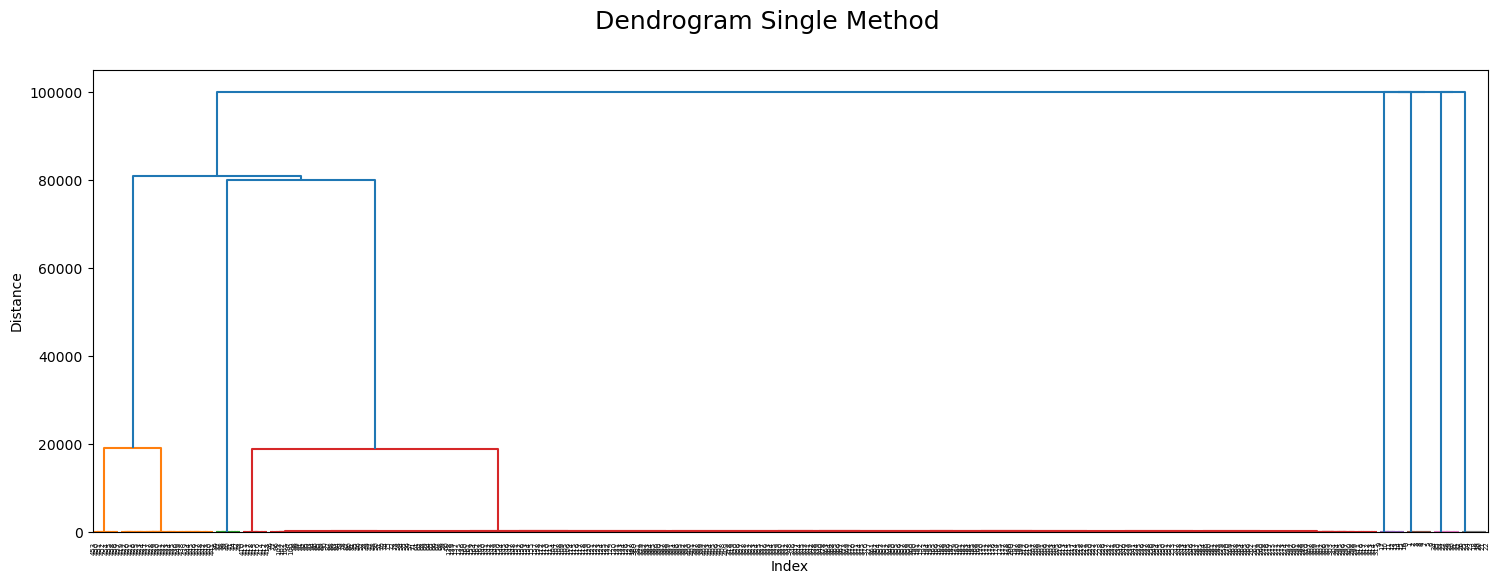

In [54]:
distance_single = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

####  4.2 Complete Method

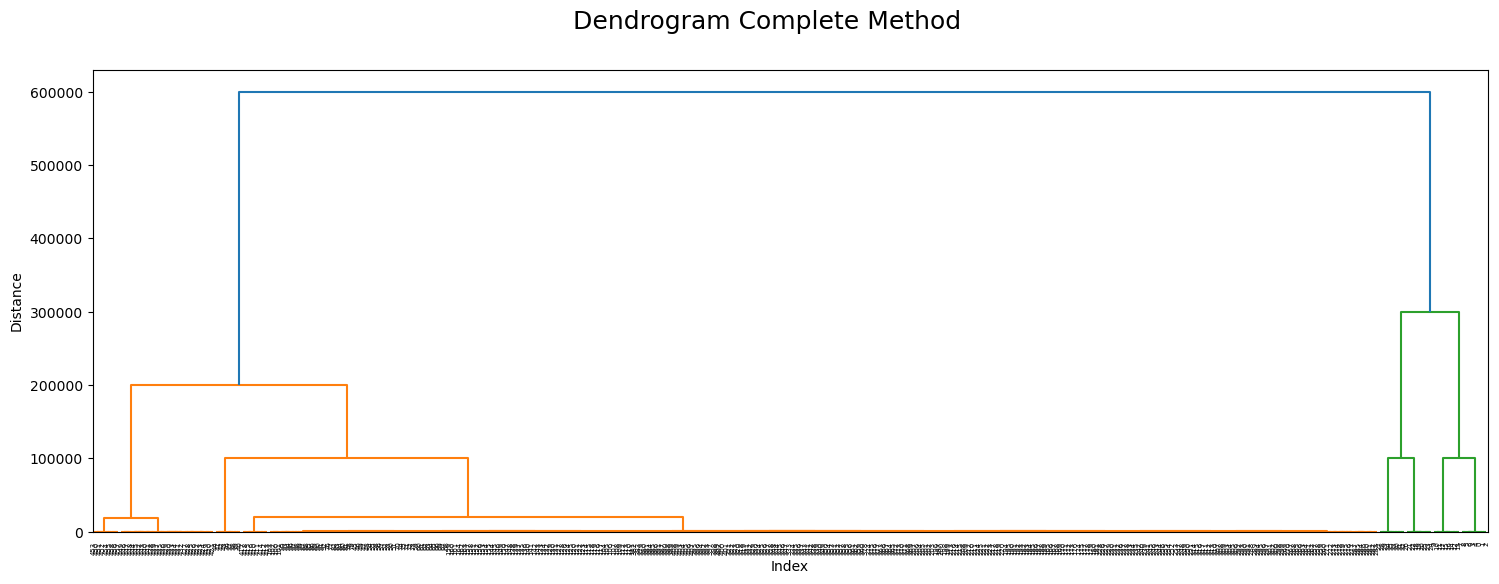

In [58]:
distance_single = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

####  4.3 Average Method

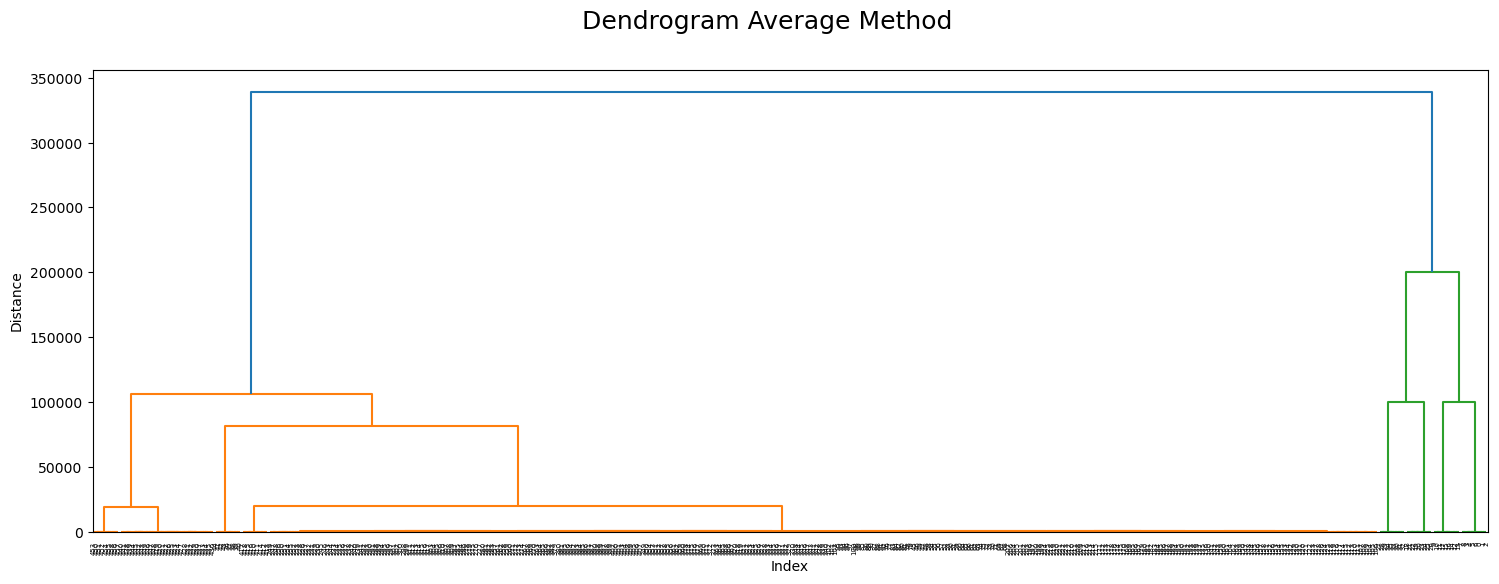

In [60]:
distance_single = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

####  4.4 Ward Method

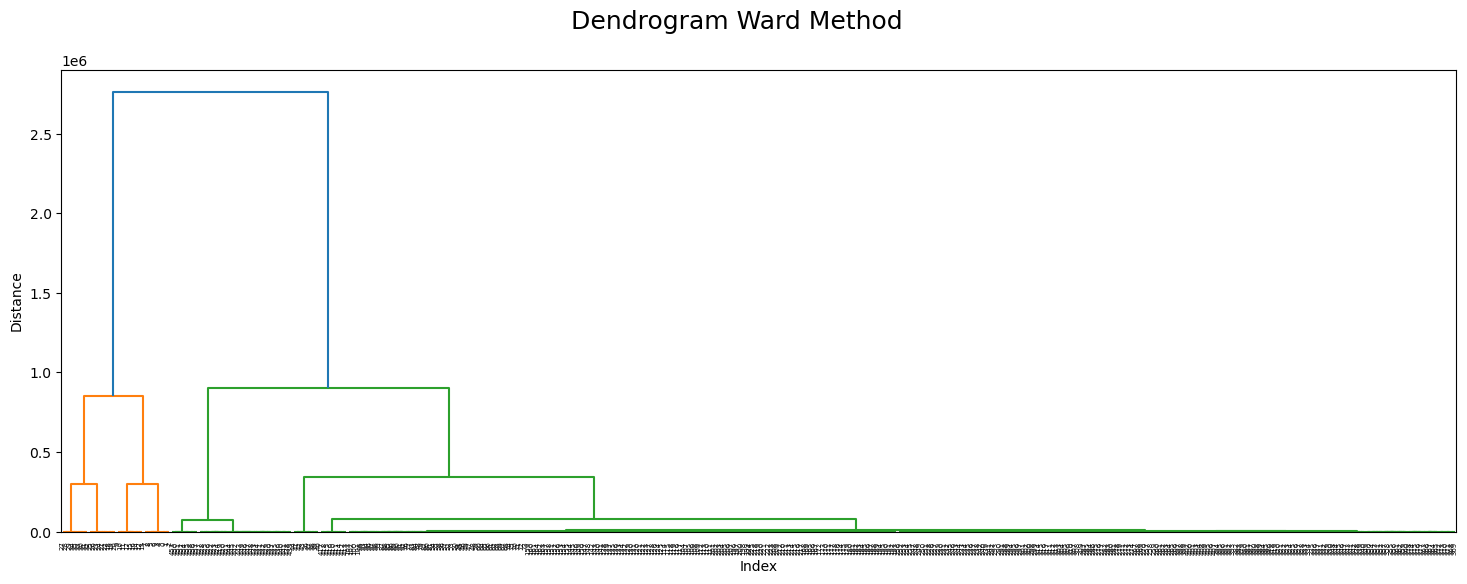

In [62]:
distance_single = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()